In [1]:
! pip install autoviz
! pip install kagglehub

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from __future__ import print_function
import argparse
import os
import torch
import torchvision
import torchvision.utils
from torch.utils.data import DataLoader, Dataset
import cv2
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from PIL import Image
import torch.optim as optim
import time
from tqdm import tqdm
import requests

In [5]:
# Load in the Wafer images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

classes = ('Center', 'Donut', 'Edge Local', 'Edge Ring', 'Local', 'near full', 'none', 'random', 'Scratch')

# Use ImageFolder to load images from the extracted directory
trainset = datasets.ImageFolder(root='./WM811k_Dataset', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

print("Finished")

Finished


In [7]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

def img_loader(filename):
    return cv2.resize(cv2.imread(filename, cv2.IMREAD_GRAYSCALE), (32,32))

data = ImageFolder(root='./WM811k_Dataset/', loader=img_loader, transform=transform)
data.classes

['Center',
 'Donut',
 'Edge Local',
 'Edge Ring',
 'Local',
 'Scratch',
 'near full',
 'none',
 'random']

In [9]:
# Split dataset
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42)
print( f"training set: {len(train_data)} testing set: {len(test_data)}")

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

training set: 766 testing set: 136


In [11]:
# Examine a sample
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([32, 3, 32, 32])
torch.Size([32])


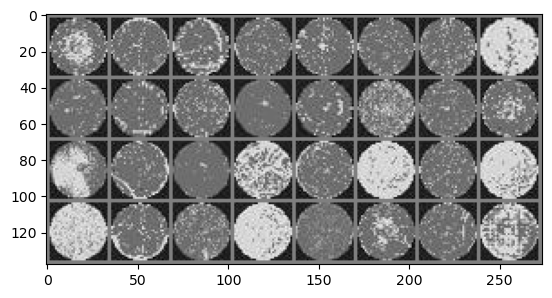

5


In [13]:
# Show sample images
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(len(test_loader))

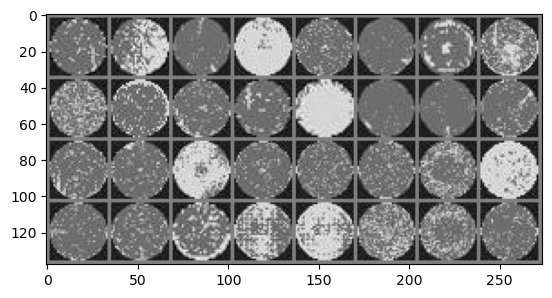

5


In [14]:
# Show sample images
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(len(test_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


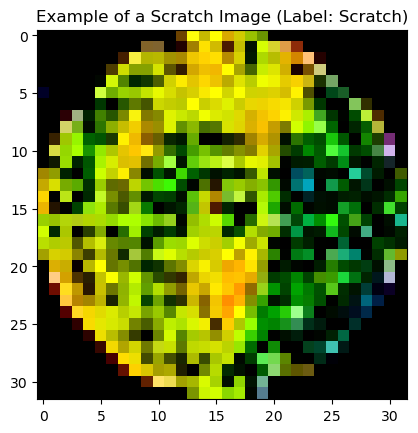

In [15]:
# Show a specific image related to the 'Scratch' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
scratch_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Scratch')]
if scratch_indices:
  scratch_index = scratch_indices[20]  # Take the first one

  # Get the image and label
  image, label = trainset[scratch_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Scratch Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Scratch' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


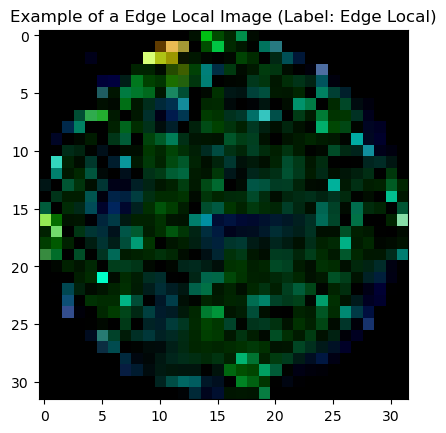

In [16]:
# Show a specific image related to the 'Edge Local' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
edge_local_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Edge Local')]
if edge_local_indices:
  edge_local_index = edge_local_indices[0]

  # Get the image and label
  image, label = trainset[edge_local_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Edge Local Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Edge Local' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


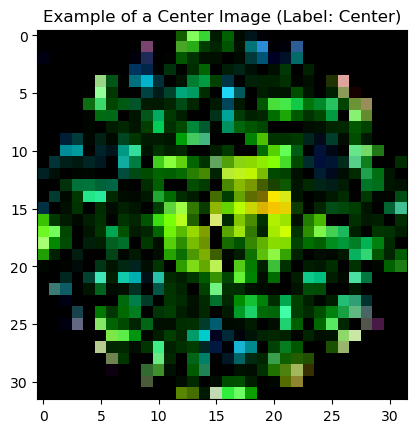

In [21]:
# Show a specific image related to the 'Center' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
center_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Center')]
if center_indices:
  center_index = center_indices[0] 

  # Get the image and label
  image, label = trainset[center_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Center Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Center' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


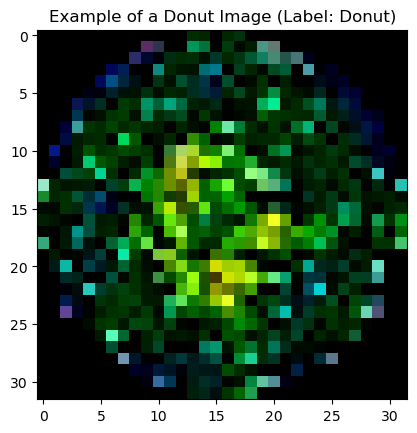

In [23]:
# Show a specific image related to the 'Donut' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
donut_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Donut')]
if donut_indices:
  donut_index = donut_indices[20]

  # Get the image and label
  image, label = trainset[donut_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Donut Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Donut' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


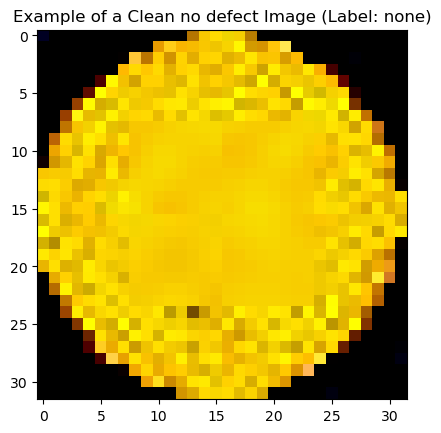

In [25]:
# Show a specific image related to the 'none' class

# Find the index of an image with 'none' label
none_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('none')]
if none_indices:
  none_index = none_indices[50]

  # Get the image and label
  image, label = trainset[none_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Clean no defect Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Clean no defect' images found in the dataset.")

In [27]:
# Define the LeNet5 network

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.fc1 = nn.Linear(512 * 2 * 2, 1024) 
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 512 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instantiate the model
net = LeNet5()
print("Finished")
print(net)

Finished
LeNet5(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=512, out_features=9, bias=True)
)


In [27]:
# Define the LeNet5 network

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.fc1 = nn.Linear(256 * 2 * 2, 512) 
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instantiate the model
net = LeNet5()
print("Finished")
print(net)

Finished
LeNet5(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=9, bias=True)
)


In [41]:
# Instantiate the improved model
net = LeNet5()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Use GPU if available
net.to(device)

print(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) # Use Adam optimizer
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 490  # Reduced for demonstration purposes. Increase for better performance

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) # Move data to the device
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.6f}')

print('Finished Training')
print(device)

#Save the trained model
torch.save(net.state_dict(), 'lenet_model.pth')
print("Finished")

cpu
Epoch [1/490], Loss: 2.167540
Epoch [2/490], Loss: 1.934389
Epoch [3/490], Loss: 1.733430
Epoch [4/490], Loss: 1.623793
Epoch [5/490], Loss: 1.433354
Epoch [6/490], Loss: 1.235739
Epoch [7/490], Loss: 1.101359
Epoch [8/490], Loss: 1.032390
Epoch [9/490], Loss: 0.836472
Epoch [10/490], Loss: 0.847463
Epoch [11/490], Loss: 0.659503
Epoch [12/490], Loss: 0.592984
Epoch [13/490], Loss: 0.542125
Epoch [14/490], Loss: 0.461553
Epoch [15/490], Loss: 0.384931
Epoch [16/490], Loss: 0.327886
Epoch [17/490], Loss: 0.288257
Epoch [18/490], Loss: 0.304056
Epoch [19/490], Loss: 0.184847
Epoch [20/490], Loss: 0.238391
Epoch [21/490], Loss: 0.135035
Epoch [22/490], Loss: 0.119869
Epoch [23/490], Loss: 0.096021
Epoch [24/490], Loss: 0.085762
Epoch [25/490], Loss: 0.066190
Epoch [26/490], Loss: 0.034537
Epoch [27/490], Loss: 0.053621
Epoch [28/490], Loss: 0.059722
Epoch [29/490], Loss: 0.054147
Epoch [30/490], Loss: 0.044369
Epoch [31/490], Loss: 0.076529
Epoch [32/490], Loss: 0.101718
Epoch [33/490

In [43]:
# Evaluation
net.eval()
correct = 0
total = 0
counter = 0

with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        counter +=1

print(f'Accuracy of the network on the Training images: {100 * correct / total}%')
print(f'Correct: {correct} Total: {total}')
print(net)

Accuracy of the network on the Training images: 100.0%
Correct: 766 Total: 766
LeNet5(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=9, bias=True)
)


Accuracy of the network on the Training images: 100.00%
Correct: 766 Total: 766
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        88
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        89
           8       1.00      1.00      1.00        85

    accuracy                           1.00       766
   macro avg       1.00      1.00      1.00       766
weighted avg       1.00      1.00      1.00       766



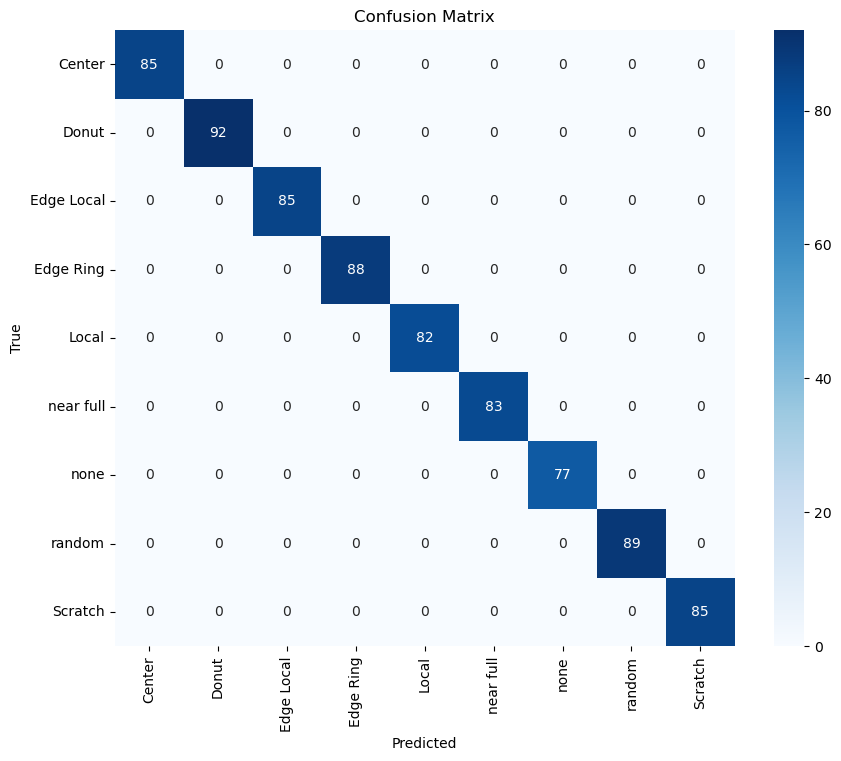

In [47]:
# Evaluation
net.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print(f'Accuracy of the network on the Training images: {100 * correct / total:.2f}%')
print(f'Correct: {correct} Total: {total}')

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(all_labels, all_predicted))

# Generate and plot the confusion matrix
cm = confusion_matrix(all_labels, all_predicted)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Evaluation
net.eval()
correct = 0
total = 0
counter = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        counter +=1

print(f'Accuracy of the network on the test images: {100 * correct / total}%')
print(f'Correct: {correct} Total: {total}')
print(net)

Accuracy of the network on the test images: 85.29411764705883%
Correct: 116 Total: 136
LeNet5(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=9, bias=True)
)


Accuracy of the network on the test images: 85.29%
Correct: 116 Total: 136
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.82      0.90      0.86        10
           2       0.79      0.83      0.81        18
           3       0.87      0.93      0.90        14
           4       0.93      0.72      0.81        18
           5       0.72      0.76      0.74        17
           6       1.00      0.89      0.94        18
           7       1.00      1.00      1.00        11
           8       0.81      0.87      0.84        15

    accuracy                           0.85       136
   macro avg       0.86      0.86      0.86       136
weighted avg       0.86      0.85      0.85       136



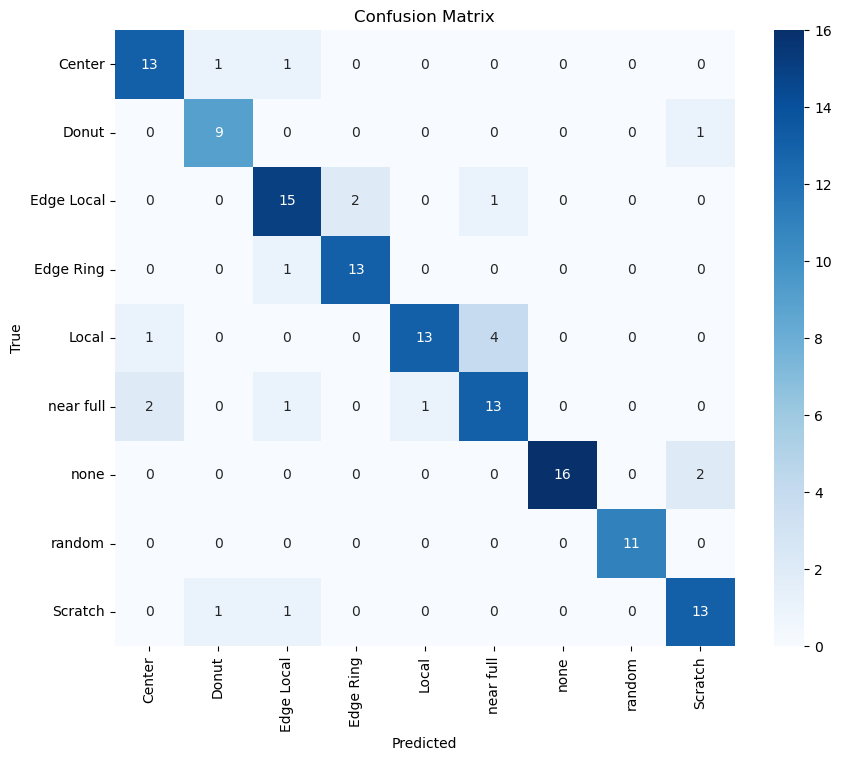

In [49]:
# Evaluation
net.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')
print(f'Correct: {correct} Total: {total}')

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(all_labels, all_predicted))

# Generate and plot the confusion matrix
cm = confusion_matrix(all_labels, all_predicted)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()